# Library

In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random

# Load dataset

In [4]:
# Image Height, Width and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator flow from directory
train_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Check the classes
train_generator.class_indices
validation_generator.class_indices

# Check the shape of the images
train_generator.image_shape
validation_generator.image_shape

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


(224, 224, 3)

In [5]:
# Check GPU
!nvidia-smi

Wed Feb 21 12:38:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:02:00.0 Off |                    0 |
|  0%   44C    P8              20W / 350W |      3MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Modified MobileNet (alpha=0.99)

In [6]:
# Define the mobile net model with the modified alpha
MobileNet_Modified099 = MobileNet(weights=None, 
                  include_top=True, 
                  input_shape=(img_height, img_width, 3),
                  classes=2,
                  classifier_activation='softmax',
                  dropout=0.01,
                  alpha=0.99)

In [7]:
# Compile the model
MobileNet_Modified099.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Check the model summary
MobileNet_Modified099.summary() 

Model: "mobilenet_0.99_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 31)      837       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 31)      124       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 31)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 31)      279       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 31

In [9]:
# Define the number of epochs
epochs = 100

# Train the model
history_Modified099 = MobileNet_Modified099.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100


I0000 00:00:1708519138.621440    1279 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 51s 42ms/step - loss: 0.0364 - accuracy: 0.9899 - val_loss: 0.0394 - val_accuracy: 0.9899
Epoch 2/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0867 - val_accuracy: 0.9826
Epoch 3/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 4/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0192 - accuracy: 0.9952 - val_loss: 7.6343 - val_accuracy: 0.5023
Epoch 5/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0073 - val_accuracy: 0.9974
Epoch 6/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 7/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0064 - val_

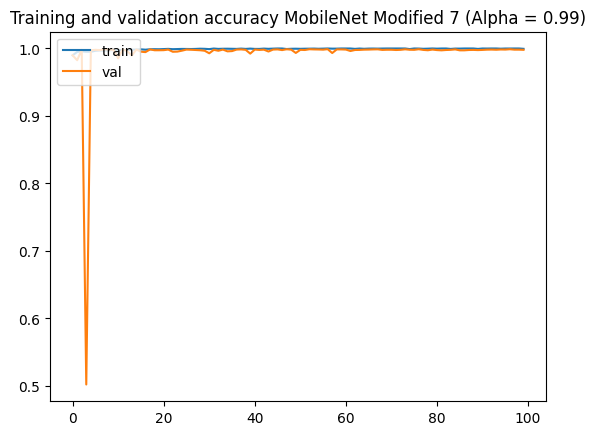

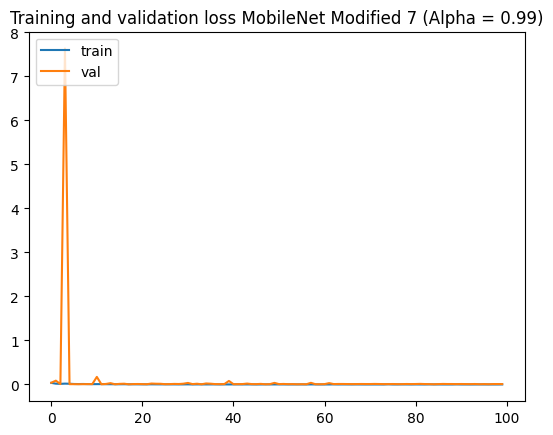

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified099.history['accuracy']
val_acc  = history_Modified099.history['val_accuracy']
loss     = history_Modified099.history['loss']
val_loss = history_Modified099.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified 7 (Alpha = 0.99)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified 7 (Alpha = 0.99)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.98)

In [11]:
# Modified model alpha = 0.98
MobileNet_Modified098 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.98)

In [12]:
# Compile the model
MobileNet_Modified098.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Check the model summary
MobileNet_Modified098.summary()

Model: "mobilenet_0.98_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 31)      837       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 31)      124       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 31)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 31)      279       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 31

In [15]:
# Train the model
history_Modified098 = MobileNet_Modified098.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 49s 41ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0527 - val_accuracy: 0.9931
Epoch 2/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 3/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.1639 - val_accuracy: 0.9679
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0074 - val_accuracy: 0.9977
Epoch 5/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0154 - val_accuracy: 0.9971
Epoch 6/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0141 - val_accuracy: 0.9961
Epoch 7/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0

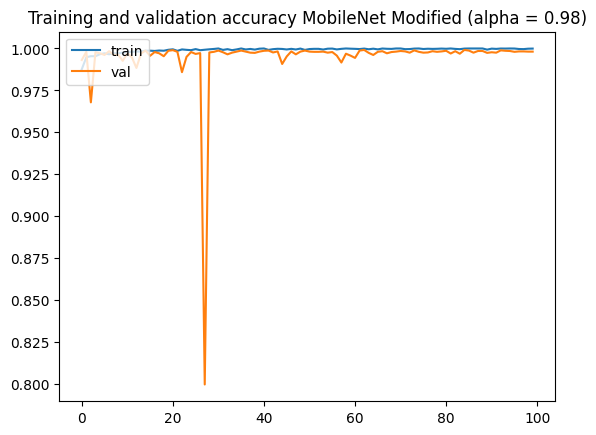

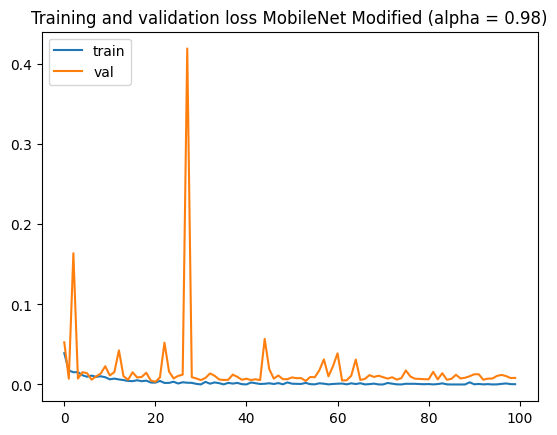

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified098.history['accuracy']
val_acc  = history_Modified098.history['val_accuracy']
loss     = history_Modified098.history['loss']
val_loss = history_Modified098.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.98)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.98)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.97)

In [17]:
# Modified model alpha = 0.97
MobileNet_Modified097 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.97)

In [18]:
# Compile the model
MobileNet_Modified097.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Check the model summary
MobileNet_Modified097.summary()

Model: "mobilenet_0.97_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 31)      837       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 31)      124       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 31)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 31)      279       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 31

In [22]:
# Train the model
history_Modified097 = MobileNet_Modified097.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 49s 41ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0129 - val_accuracy: 0.9973
Epoch 2/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.0069 - val_accuracy: 0.9981
Epoch 3/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0249 - val_accuracy: 0.9949
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0087 - val_accuracy: 0.9990
Epoch 5/100
1000/1000 [==============================] - 41s 40ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0508 - val_accuracy: 0.9954
Epoch 6/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0272 - val_accuracy: 0.9942
Epoch 7/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0

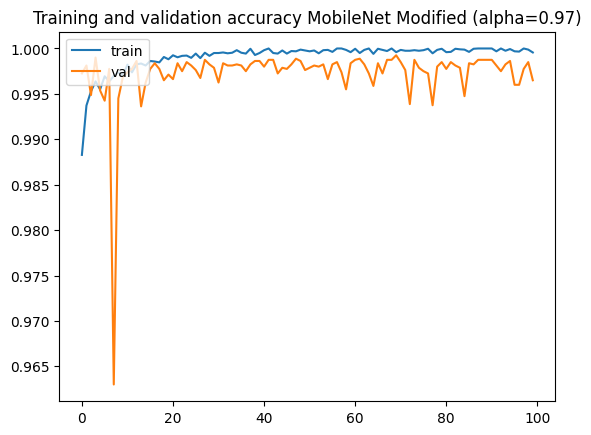

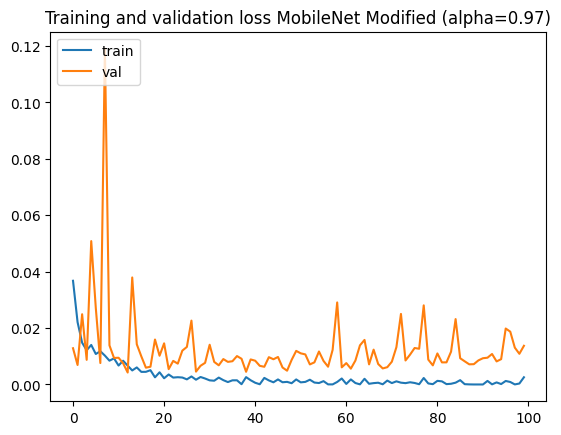

In [23]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified097.history['accuracy']
val_acc  = history_Modified097.history['val_accuracy']
loss     = history_Modified097.history['loss']
val_loss = history_Modified097.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.97)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.97)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.96)

In [24]:
# Modified model alpha = 0.96
MobileNet_Modified096 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.96)

In [25]:
# Compile the model
MobileNet_Modified096.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Check the model summary
MobileNet_Modified096.summary()

Model: "mobilenet_0.96_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 30)      810       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 30)      120       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 30)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 30)      270       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 30

In [27]:
# Train the model
history_Modified096 = MobileNet_Modified096.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 50s 42ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0252 - val_accuracy: 0.9936
Epoch 2/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0164 - val_accuracy: 0.9954
Epoch 3/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.0148 - val_accuracy: 0.9948
Epoch 4/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0059 - val_accuracy: 0.9984
Epoch 5/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 6/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0073 - val_accuracy: 0.9981
Epoch 7/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0

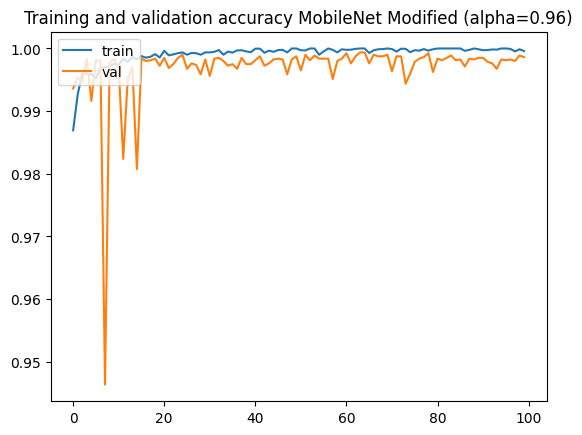

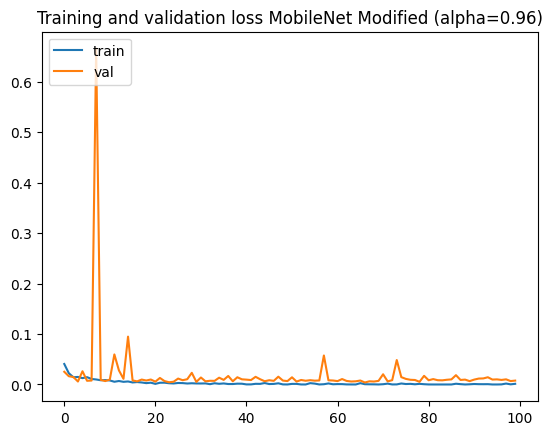

In [28]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified096.history['accuracy']
val_acc  = history_Modified096.history['val_accuracy']
loss     = history_Modified096.history['loss']
val_loss = history_Modified096.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.96)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.96)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.94)

In [29]:
# Modified model alpha = 0.94
MobileNet_Modified094 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2, 
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.94)

In [30]:
# Compile the model
MobileNet_Modified094.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Check the model summary
MobileNet_Modified094.summary()

Model: "mobilenet_0.94_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 30)      810       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 30)      120       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 30)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 30)      270       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 30

In [32]:
# Train the model
history_Modified094 = MobileNet_Modified094.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 49s 41ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0093 - val_accuracy: 0.9966
Epoch 2/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.0102 - val_accuracy: 0.9967
Epoch 3/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0149 - accuracy: 0.9958 - val_loss: 0.0129 - val_accuracy: 0.9959
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.1737 - val_accuracy: 0.9819
Epoch 5/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0049 - val_accuracy: 0.9980
Epoch 6/100
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0308 - val_accuracy: 0.9941
Epoch 7/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0

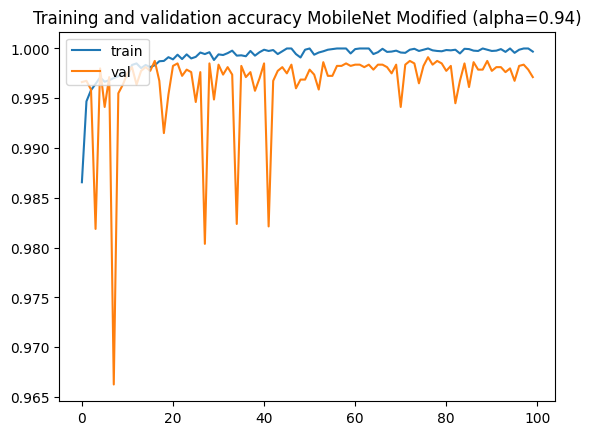

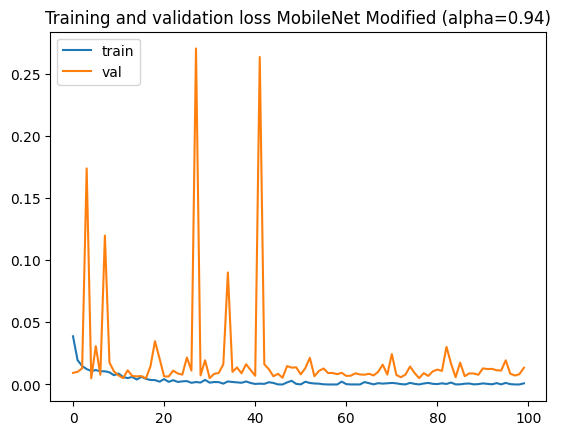

In [33]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified094.history['accuracy']
val_acc  = history_Modified094.history['val_accuracy']
loss     = history_Modified094.history['loss']
val_loss = history_Modified094.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.94)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.94)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.93)

In [34]:
# Modified model alpha = 0.80
MobileNet_Modified093 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.93)

In [35]:
# Compile the model
MobileNet_Modified093.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Check the model summary
MobileNet_Modified093.summary()

Model: "mobilenet_0.93_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 29)      783       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 29)      116       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 29)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 29)      261       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 29

In [37]:
# Train the model
history_Modified093 = MobileNet_Modified093.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 49s 41ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0434 - val_accuracy: 0.9946
Epoch 2/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0267 - val_accuracy: 0.9958
Epoch 3/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.6877 - val_accuracy: 0.7661
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0202 - val_accuracy: 0.9940
Epoch 5/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.1910 - val_accuracy: 0.9099
Epoch 6/100
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0070 - val_accuracy: 0.9975
Epoch 7/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0

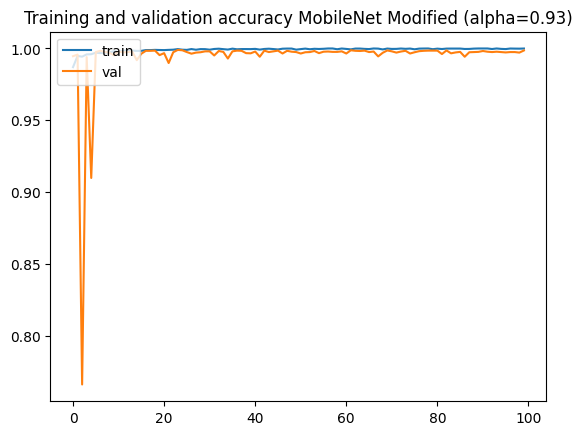

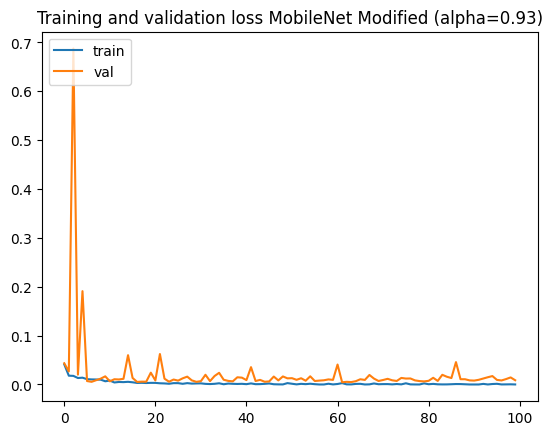

In [38]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified093.history['accuracy']
val_acc  = history_Modified093.history['val_accuracy']
loss     = history_Modified093.history['loss']
val_loss = history_Modified093.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.93)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.93)')
plt.legend(['train', 'val'], loc='upper left')

# Save All Model

In [39]:
# Save all the model
MobileNet_Modified099.save('MobileNet_Modified099.h5')
MobileNet_Modified098.save('MobileNet_Modified098.h5')
MobileNet_Modified097.save('MobileNet_Modified097.h5')
MobileNet_Modified096.save('MobileNet_Modified096.h5')
MobileNet_Modified094.save('MobileNet_Modified094.h5')
MobileNet_Modified093.save('MobileNet_Modified093.h5')